# Assignment – High Frequency Words
### DATA 620<br>David Moste &emsp; Euclid zhang &emsp; Samuel Reeves  <br>6/20/2021

Import required libraries

In [206]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import requests
import re
import matplotlib.pyplot as plt

### Data

The text we use is Chocolate and Cocoa Recipes By Miss Parloa. <br>
Downloaded from https://www.ebooksread.com/authors-eng/parloa-and-home-made-candy-by-hill/chocolate-and-cocoa-recipes-8-7.shtml

In [185]:
response = requests.get("https://raw.githubusercontent.com/ezaccountz/Data_620/main/week%204%20part%202/Chocolate-and-Cocoa--Maria-Parloa-%5Bebooksread.com%5D.txt").text

In [186]:
len(response)

143389

In [187]:
start_indicator = 'Cocoa and Chocolate'
end_indicator = 'INDEX TO RECIPES'
start = response.find(start_indicator) + len(start_end_indicator) + 1
end = response.rfind(end_indicator) - 1
raw = response[start: end]

In [188]:
tokens = word_tokenize(raw)

In [189]:
#Stemmers
porter = nltk.PorterStemmer()
normalized_tokens = [porter.stem(t) for t in tokens]

#Lemmatization
wnl = nltk.WordNetLemmatizer()
normalized_tokens = [wnl.lemmatize(t) for t in normalized_tokens]

In [190]:
words = [w for w in normalized_tokens if w.isalpha()]
words = [w.lower() for w in words]

In [191]:
len(normalized_tokens)

28216

In [192]:
total_words = len(words)
total_words

23092

### Unique Words

In [193]:
len(set(words))

1665

In [194]:
freDist = nltk.FreqDist(words)

In [195]:
freDist_dataframe = pd.DataFrame(freDist.items(), columns=['word', 'frequency'])
freDist_dataframe = freDist_dataframe.sort_values(by = 'frequency', ascending = False)
freDist_dataframe.reset_index(inplace = True, drop = True)

In [196]:
freDist_dataframe['cumulative frequency'] = freDist_dataframe['frequency'].cumsum()/total_words

In [197]:
freDist_dataframe

,word,frequency,cumulative frequency
0,the,1519,0.065780
1,of,1343,0.123939
2,and,1033,0.168673
3,a,1025,0.213061
4,in,541,0.236489
...,...,...,...
1660,hop,1,0.999827
1661,extraordinari,1,0.999870
1662,analyst,1,0.999913
1663,massachusett,1,0.999957


Number of unique words represent half of the total words in the corpus

In [198]:
n_50 = sum(freDist_dataframe['cumulative frequency'] < 0.5)+1
n_50

37

In [199]:
display(freDist_dataframe.iloc[n_50])

word                         thi
frequency                    112
cumulative frequency    0.509051
Name: 37, dtype: object

### unique words represent half of the total words

### 200 highest frequency words

In [200]:
for i in range(10):
    display(freDist_dataframe.iloc[0+i*20:20+i*20, 0:2].T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
word,the,of,and,a,in,chocol,to,cup,it,sugar,with,or,water,one,is,add,into,stir,for,until
frequency,1519,1343,1033,1025,541,456,411,322,313,287,259,225,222,220,211,201,187,185,177,168


,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
word,on,milk,tablespoon,boil,teaspoon,vanilla,cream,then,baker,be,when,beat,cold,two,put,egg,butter,thi,half,hot
frequency,161,160,159,154,153,153,140,140,134,131,128,128,127,122,118,117,113,112,111,104


,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
word,minut,mixtur,cocoa,over,from,pan,cook,melt,fire,use,cake,that,flour,bake,salt,an,pour,three,fondant,white
frequency,103,101,100,91,90,86,85,82,81,80,77,76,74,74,73,72,72,71,70,69


,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
word,not,place,small,are,will,mix,let,about,at,powder,have,make,littl,if,cut,veri,drop,turn,cool,by
frequency,67,64,62,62,62,62,62,62,61,58,57,57,56,56,55,54,53,53,52,51


,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
word,ounc,them,walter,which,ha,squar,illustr,all,set,saucepan,candi,level,ball,no,serv,enough,dip,time,smooth,been
frequency,51,50,50,49,49,48,46,46,45,45,45,44,43,43,42,42,42,42,41,41


,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
word,flavor,syrup,take,piec,togeth,oven,prepar,almond,pound,thick,coat,they,premium,nut,out,remov,but,more,well,dot
frequency,41,40,40,40,40,40,39,39,38,38,37,36,36,35,35,35,35,35,35,35


,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139
word,sift,ice,fine,each,packag,cover,four,paper,dish,glucos,pint,other,extract,made,these,may,lb,after,soft,top
frequency,34,34,33,33,33,32,31,31,31,31,31,31,31,30,30,30,30,29,29,29


,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159
word,whip,quart,gradual,granul,should,bowl,dissolv,roll,marbl,moder,onto,past,fudg,yolk,hour,inch,constantli,begin,stiff,beaten
frequency,28,28,28,28,28,27,27,27,26,26,26,26,26,26,25,25,24,24,24,24


,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179
word,spoon,pure,shape,stand,can,fork,pud,caramel,mould,first,up,so,chop,cinnamon,good,do,everi,side,cloth,cornstarch
frequency,23,23,23,23,23,22,22,22,22,21,21,21,21,21,21,21,21,21,21,20


,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
word,oil,spread,firm,five,pinch,layer,thin,same,part,glossi,center,gelatin,harden,ad,while,form,fill,few,now,nearli
frequency,20,20,20,20,20,19,19,19,19,19,19,19,19,18,18,18,18,18,18,18


### graph that shows the relative frequency of these 200 words

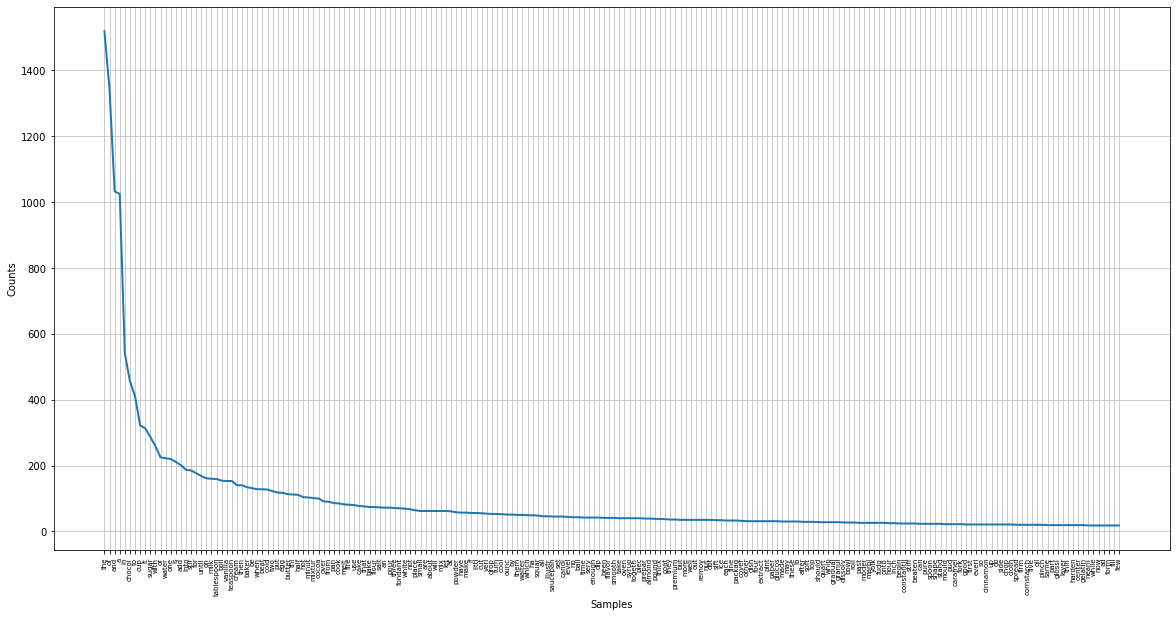

In [201]:
plt.figure(figsize=(20, 10))
freDist.plot(200)
plt.show()

### Zipf’s law

Zipf’s Law: Let f(w) be the frequency of a word w in free text. Suppose that all
the words of a text are ranked according to their frequency, with the most frequent
word first. Zipf’s Law states that the frequency of a word type is inversely
proportional to its rank (i.e., f × r = k, for some constant k).

Assume that the distribution follow Zupf's law. Then the constant should be close to frequency(rank 1 word)

In [202]:
k = freDist_dataframe.iloc[0,1]
k

1519

calculate the frequency of the remaining words based on k

In [203]:
k_frequency = [freDist_dataframe.iloc[0,1]]
for i in range(2,201):
    k_frequency.append(k/i)

In [204]:
freDist_dataframe['frequency'][0:200]

0      1519
1      1343
2      1033
3      1025
4       541
       ... 
195      18
196      18
197      18
198      18
199      18
Name: frequency, Length: 200, dtype: int64

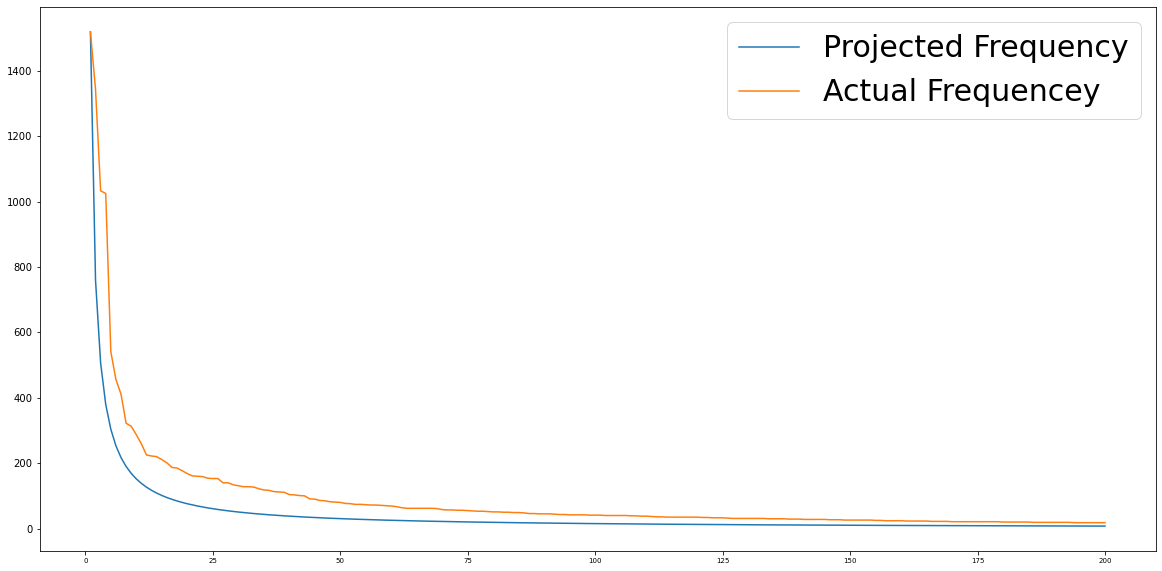

In [205]:
plt.figure(figsize=(20, 10))
plt.plot(range(1,201), k_frequency)
plt.plot(range(1,201), freDist_dataframe['frequency'][0:200])
plt.legend(["Projected Frequency", "Actual Frequencey"], prop={'size': 30})
plt.show()

The actual frequency distribution is very close to Zipf’s Law

### In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

The text we selected is Chocolate and Cocoa Recipes. As we see, most of the words in the corpus are food such as sugar and milk, and cooking tools such as cup and spoon. These words do not have such high frequency in texts of other topics. Vice versa, some high frequency words in the texts of other topic may not appear here. For example, the instruments in a book about music